In [1]:
from experiments.ina_schneider import (schneider_iv,
                                    schneider_tauf,
                                    schneider_taum,
                                    schneider_taus,
                                      schneider_inact,
                                       schneider_inact_128,
                                      schneider_reduc,
                                       schneider_reduc_95,
                                      schneider_recov,
                                      schneider_recov_95)
#
from experiments.ina_sakakibara import (sakakibara_iv_Nao2 ,
#                                                sakakibara_iv_Nao5 ,
#                                                sakakibara_iv_Nao20 ,
#                                                sakakibara_act,
#                                                sakakibara_inact,
                                                sakakibara_inact_kin_1,
#                                                sakakibara_inact_kin_2,
#                                                sakakibara_inact_kin_80,
                                                sakakibara_inact_kin_100)
#                                                sakakibara_recov,
#                                                sakakibara_recov_100,
#                                                sakakibara_recov_kin) 

from experiments.ica_Li import (Li_iv_80,
                               Li_iv_60,
                                Li_iv_40,
                               Li_act,
                               Li_inact_1000,
                                Li_inact_300,
                                Li_inact_150,
                                Li_inact_kin_40,
                                Li_inact_kin_60,
                                Li_inact_kin_80,
                                Li_recov_80,
                                Li_recov_40
                               )
# Li_iv_80 : assert len ok, curve ok
# Li_iv_60 : assert len ok, curve ok
# Li_iv_40 : assert len ok, curve ok
# Li_act : assert len ok, curve ok , doesn't finish at 1 though
# Li_inact_(all) : assert len ok, curve ok , start at 1 when printing output, 
# but summary statistics doesn't return the same output
# Li_inact_kin(all) : assert len ok, curve not ok : decreasing instead of being normal

from ionchannelABC.experiment import setup
from ionchannelABC.visualization import plot_sim_results
import pandas as pd
from pyabc import History
import os, tempfile
#modelfile = 'models/nygren_Na.mmt'
modelfile = 'models/ina_simple.mmt'
#modelfile = 'models/nygren_IcaL.mmt'

INFO:myokit:Loading Myokit version 1.28.4


[ 3.55945877 65.21919235]


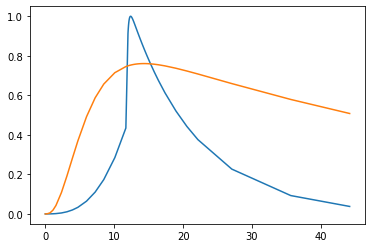

[ 3.31693809 50.39345615]


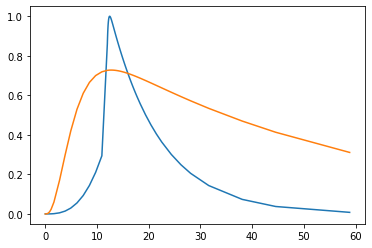

[ 3.5567412  62.10947716]


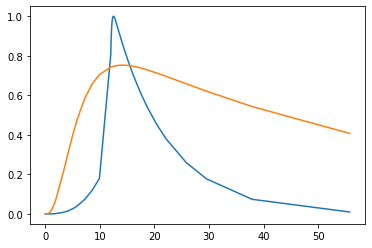

[4.21213805 0.27448025]


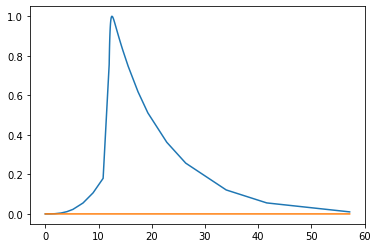

[3.94976996 0.24781278]


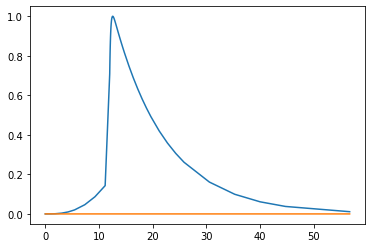

[3.79934891 0.22851582]


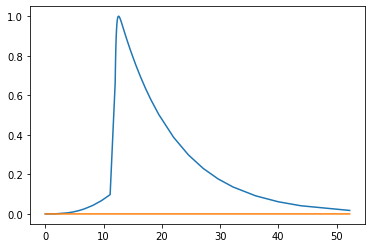

[3.7676344  0.21719566]


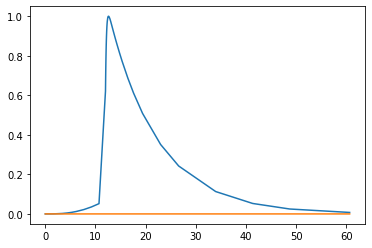

[3.81104884 0.21012334]


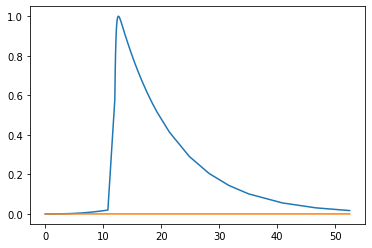

[3.91374924 0.20649225]


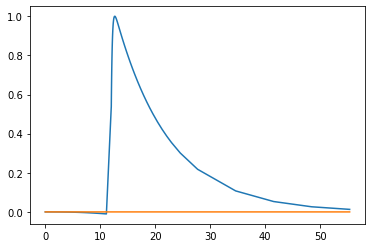

In [2]:
observations, model, summary_statistics = setup(modelfile,
                                                schneider_taum)

#print(observations)
assert len(observations)==len(summary_statistics(model({})))

In [3]:
#print(observations)

In [4]:
#summary_statistics(model({}))

In [5]:
#grid = plot_sim_results(modelfile,schneider_recov_95,n_samples=1) 
#grid.set_xlabels('t_wait in ms')
#grid.set_ylabels('I_test/I_cond')
#grid.set_titles('Recovery')
#grid = plot_sim_results(modelfile,schneider_reduc_95,n_samples=1) 
#grid.set_titles('Availability')
#grid.set_xlabels('t_test in ms')
#grid.set_ylabels('I_test/I_cond')

In [6]:
#db_path = ("sqlite:///" +
#           os.path.join(tempfile.gettempdir(), "nygren_ina_testing.db"))
#history = History(db_path)
#history.id = 41 
#df, w = history.get_distribution(m=0)

#n_samples = 10 # increasing this number will produce a better approximation to the true output, recommended: >= 100
               # we keep 10 to keep running time low
#parameter_samples = df.sample(n=n_samples, weights=w, replace=True)
#parameter_samples.head()


In [7]:
#df.describe()